In [59]:
import numpy as np
import pandas
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import networkx as nx

In [62]:
bio_cont_2 = pandas.read_csv('MAM4-exemples/bio_cont_2.csv')
print(bio_cont_2.shape)

(301, 81)


In [63]:
bio_cont_2.head(5)

,valid,K_atp,K_atp:glyc1,K_atp:nopla,K_atp:noprola,K_atp:phoxa,K_atp:glyc1:phoxa,K_atp:glyc1:glyc2,K_atp:nopla:noprola,K_atp:nopla:phoxa,...,K_nadh:gpdh:krebsn:noaas:phoxn,K_nadh:fermn:krebsn:noaas:phoxn,K_nadh:fermn:gpdh:krebsn:noaas:phoxn,K_krebs,K_krebs:box,K_krebs:pnh,K_krebs:pnh:sat,K_phox,K_phox:pc,Error explanation
0,NaN,0.0,0.0,0.0,0.0,1.1,1.1,1.1,0.0,1.2,...,1.1,1.1,1.1,0.0,0.0,1.1,2.2,0.0,1.1,NaN
1,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
2,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
3,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
4,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN


On enlève la première ligne qui est juste une indication sur les valeurs prises par chaque colonne.

In [64]:
bio_cont_2 = bio_cont_2.drop([0],axis=0)


In [65]:
bio_cont_2.head(5)

,valid,K_atp,K_atp:glyc1,K_atp:nopla,K_atp:noprola,K_atp:phoxa,K_atp:glyc1:phoxa,K_atp:glyc1:glyc2,K_atp:nopla:noprola,K_atp:nopla:phoxa,...,K_nadh:gpdh:krebsn:noaas:phoxn,K_nadh:fermn:krebsn:noaas:phoxn,K_nadh:fermn:gpdh:krebsn:noaas:phoxn,K_krebs,K_krebs:box,K_krebs:pnh,K_krebs:pnh:sat,K_phox,K_phox:pc,Error explanation
1,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
2,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
3,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
4,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN
5,OK,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,NaN


In [72]:
bio_cont_2.loc[bio_cont_2["valid"]=="OK", "valid"] = 1
bio_cont_2.loc[bio_cont_2["valid"]=="KO", "valid"] = 0
pandas.to_numeric(bio_cont_2["valid"])
bio_cont_2.head(3)
print(bio_cont_2.shape)

(300, 81)


In [78]:
nv_base = bio_cont_2.drop(['Error explanation'],axis=1)
print(nv_base.shape)

(300, 80)


In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [80]:
Z = linkage(nv_base,method='average',metric='jaccard')

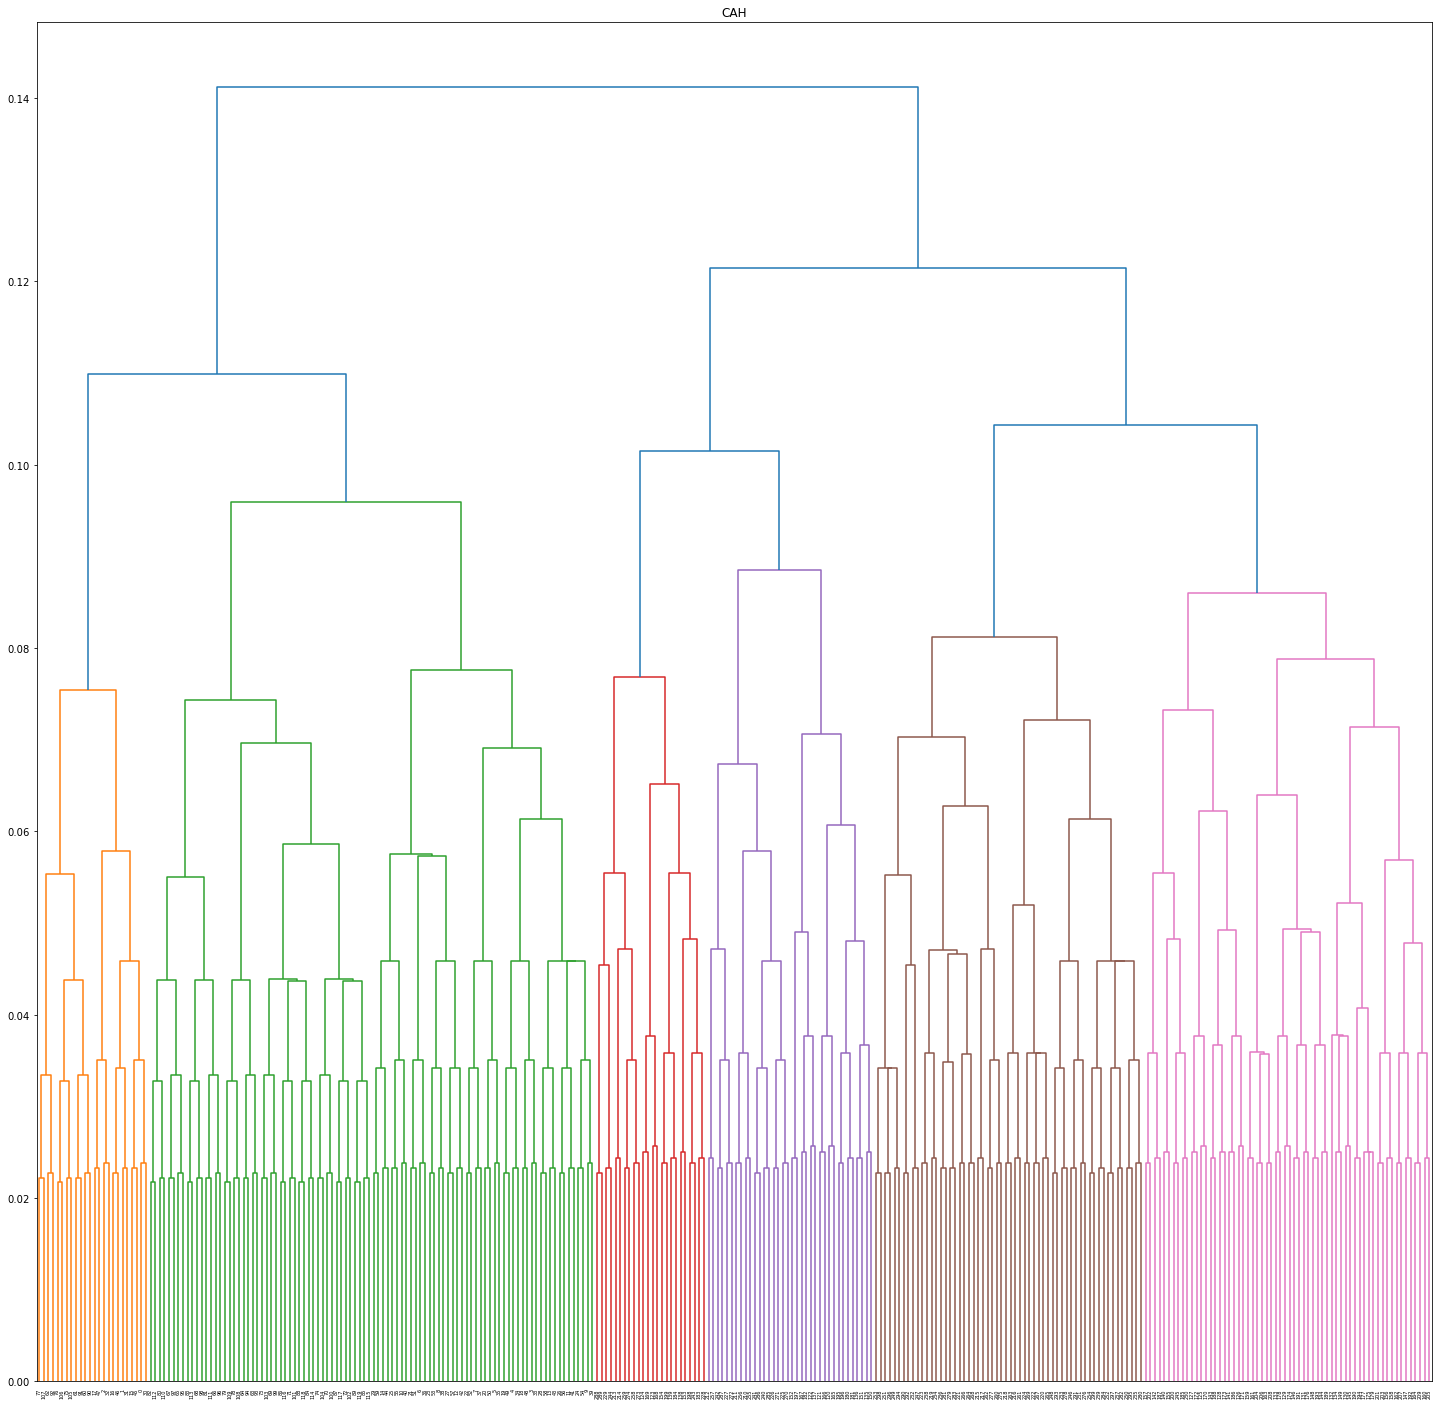

In [81]:
fig = plt.figure(1, figsize=(25, 25))
plt.title("CAH")
dendrogram(Z)
plt.axhline(y=0.4)
plt.show()

D'après ce que j'ai compris pour l'instant on trouve le nombre de cluster optimal est trouveé en fonction de la distance qu'on souhaite entre 1 point et son plus proche voisin, dans notre cas si on prend la distance maximale = 0.4
On trace une droite verticale au niveau de 0.4 et on compte le nombre de branches qu'on intercepte.
Ici on trouve 4 clusters pour une distance maximale de 0.4
On le visualise dans l'autre sens pour mieux voir.

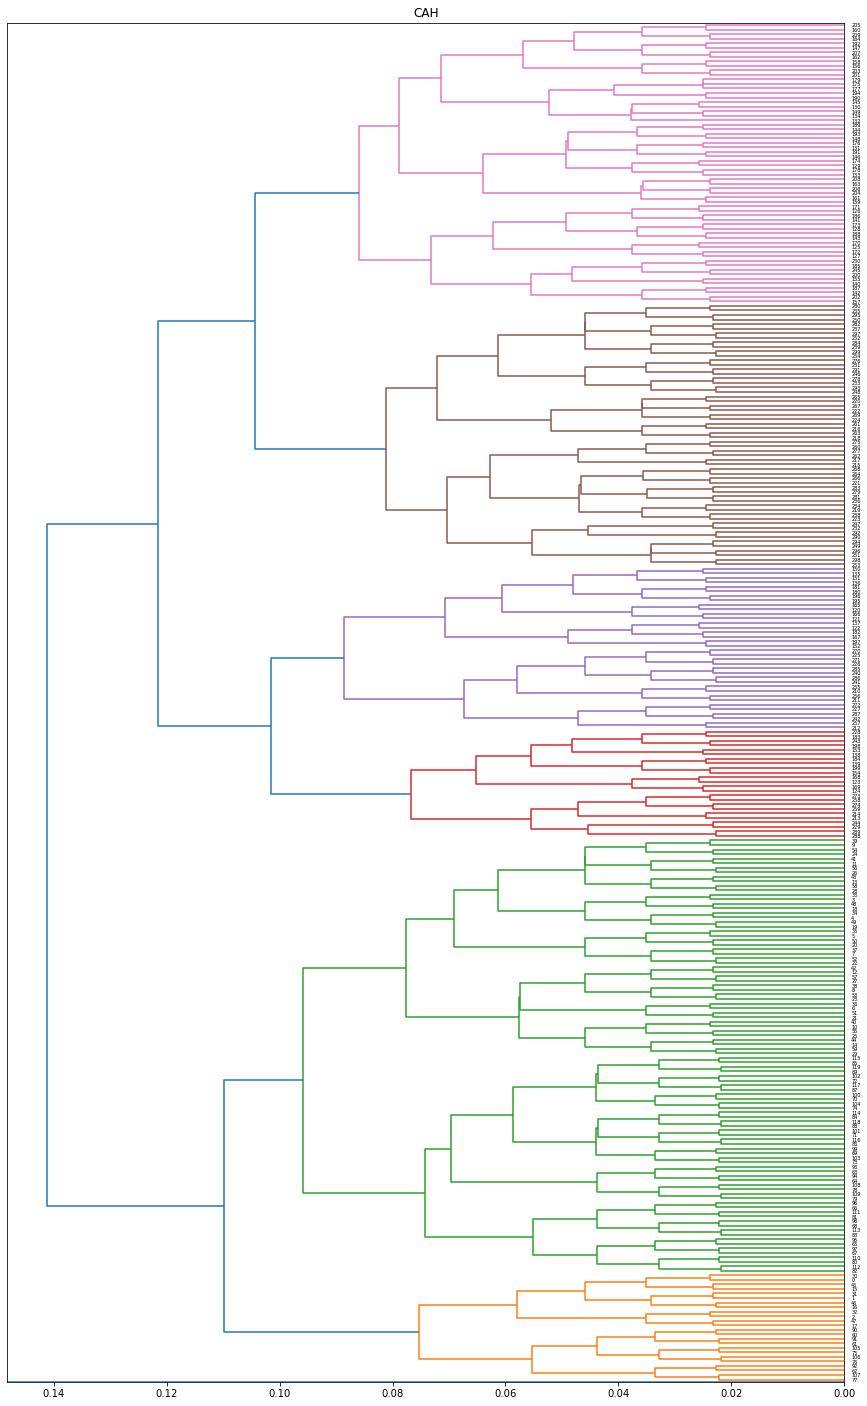

In [82]:
fig = plt.figure(1, figsize=(15, 25))
plt.title("CAH")
dendrogram(Z,orientation='left')
plt.axhline(y=0.4)
plt.show()

Pour l'instant on ne sait pas trop combien il faut de cluster.
Prenons arbitrairement 2.

In [118]:
k = 6

In [119]:
from scipy.cluster.hierarchy import fcluster, cophenet
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [120]:
Hc = AgglomerativeClustering(n_clusters=k, affinity='jaccard', linkage='average')

In [121]:
Hc.fit(nv_base)

AgglomerativeClustering(affinity='jaccard', linkage='average', n_clusters=6)

In [122]:
l = Hc.labels_

In [123]:
def affiche_cluster(label, nb_cluster):
    for i in range(nb_cluster):
        print(np.where(label==i))

In [124]:
affiche_cluster(l,k)

(array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119]),)
(array([120, 121, 122, 135, 136, 137, 150, 151, 152, 165, 166, 167, 180,
       181, 182, 195, 196, 197, 210, 211, 212, 225, 226, 227, 240, 241,
       242, 255, 256, 257, 270, 271, 272, 285, 286, 287]),)
(array([125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 185, 186, 187, 188, 189, 1

On remarque que les clusters 1 et 2 sont composés uniquement de modèle OK

Maintenant on va enlever la colonne valid et voir ce qu'on obtient comme cluster.

In [125]:
nv_base_2 = nv_base.drop(["valid"], axis = 1)

In [173]:
k = 4
#Hc = AgglomerativeClustering(n_clusters=k, affinity='jaccard', linkage='complete')
Hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hc.fit(nv_base_2)
l = Hc.labels_
#affiche_cluster(l,k)

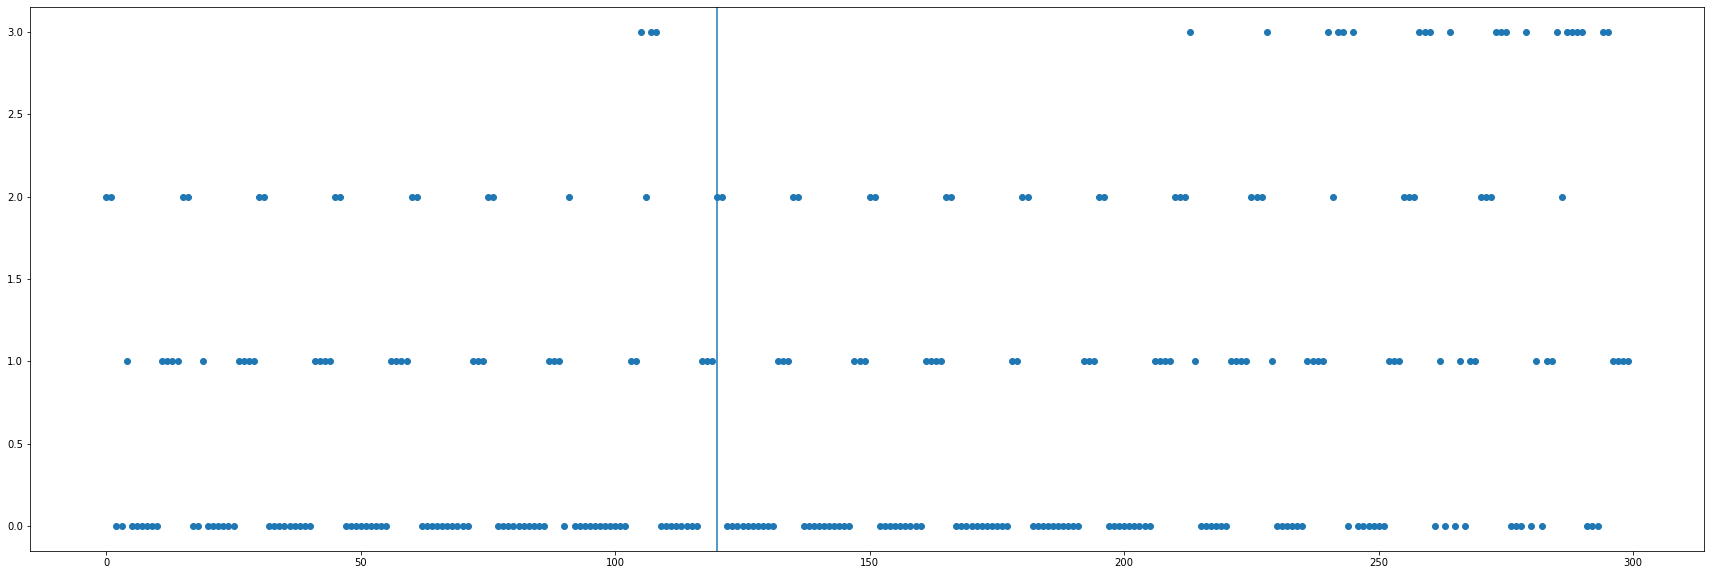

In [174]:
fig = plt.figure(2, figsize = (30,10))
plt.scatter(range(300),l)
plt.axvline(x=120)